In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Algoritmo
# ==============================================================================
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

# Metricas de evaluación
# ==============================================================================
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.simplefilter(action='ignore')

In [2]:
dataset_dir = 'Dataset_Final/Dataset_Completo.csv' #Se carga el dataset
df_c = pd.read_csv(dataset_dir, sep=(',')) #Se lee el archivo csv el cual está separado por comas
df_c #Se imprime el dataset

,CodDepartamento,CodCiudad,Departamento,Ciudad,Ano,Trimestre,PorcentajeDesempleo,Temperatura,Precipitacion,PIB,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,PorcentajeVacunacion,Vulnerabilidad_numero,Incidencia
0,5,1,Antioquia,Medellin,2020,1,12.9,24.149651,7.957837,46018.0,-12.489606,-8.493907,-11.392832,-9.280287,-5.809319,4.227240,0.00,2.0,0.000024
1,5,1,Antioquia,Medellin,2020,2,25.2,22.286968,5.173339,46018.0,-67.037634,-44.896057,-55.349462,-62.886022,-50.243011,25.524731,0.00,2.0,0.000825
2,5,1,Antioquia,Medellin,2020,3,20.0,22.739094,7.672982,46018.0,-50.040860,-28.913620,-39.594624,-51.555556,-34.839427,17.956272,0.00,2.0,0.026520
3,5,1,Antioquia,Medellin,2020,4,15.2,23.157370,8.176094,46018.0,-28.945878,-3.579928,-27.370968,-28.567742,-19.315054,10.191756,0.00,2.0,0.033072
4,5,1,Antioquia,Medellin,2021,1,17.9,22.285123,6.276447,52347.0,-32.214670,-0.670507,-31.100230,-34.711982,-20.892857,9.510369,0.66,2.0,0.024737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,88,1,Archipielago de San Andres,Sanandres,2020,4,25.3,25.658387,0.000000,1027.0,-57.937993,-29.239427,-60.999642,-41.625090,-32.145878,13.854480,0.00,1.0,0.014034
188,88,1,Archipielago de San Andres,Sanandres,2021,1,16.0,26.667411,0.000000,1300.0,-36.820661,-11.887865,-48.219662,-15.671659,-21.868280,9.530722,0.51,1.0,0.005350
189,88,1,Archipielago de San Andres,Sanandres,2021,2,16.0,28.111204,0.000000,1300.0,-23.432616,-3.455914,-47.115412,-0.963082,-16.767384,11.880645,13.53,1.0,0.061390
190,88,1,Archipielago de San Andres,Sanandres,2021,3,11.9,23.849370,0.000000,1300.0,1.812545,11.936918,-38.234050,31.749821,-7.212903,6.475986,56.77,1.0,0.006413


In [3]:
df = df_c.drop(["CodCiudad","Departamento","Ciudad"], axis =1) #Se borran la columnas no númericas y codCiudad ya que siempre es 1
df #Se imprime el dataset

,CodDepartamento,Ano,Trimestre,PorcentajeDesempleo,Temperatura,Precipitacion,PIB,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,PorcentajeVacunacion,Vulnerabilidad_numero,Incidencia
0,5,2020,1,12.9,24.149651,7.957837,46018.0,-12.489606,-8.493907,-11.392832,-9.280287,-5.809319,4.227240,0.00,2.0,0.000024
1,5,2020,2,25.2,22.286968,5.173339,46018.0,-67.037634,-44.896057,-55.349462,-62.886022,-50.243011,25.524731,0.00,2.0,0.000825
2,5,2020,3,20.0,22.739094,7.672982,46018.0,-50.040860,-28.913620,-39.594624,-51.555556,-34.839427,17.956272,0.00,2.0,0.026520
3,5,2020,4,15.2,23.157370,8.176094,46018.0,-28.945878,-3.579928,-27.370968,-28.567742,-19.315054,10.191756,0.00,2.0,0.033072
4,5,2021,1,17.9,22.285123,6.276447,52347.0,-32.214670,-0.670507,-31.100230,-34.711982,-20.892857,9.510369,0.66,2.0,0.024737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,88,2020,4,25.3,25.658387,0.000000,1027.0,-57.937993,-29.239427,-60.999642,-41.625090,-32.145878,13.854480,0.00,1.0,0.014034
188,88,2021,1,16.0,26.667411,0.000000,1300.0,-36.820661,-11.887865,-48.219662,-15.671659,-21.868280,9.530722,0.51,1.0,0.005350
189,88,2021,2,16.0,28.111204,0.000000,1300.0,-23.432616,-3.455914,-47.115412,-0.963082,-16.767384,11.880645,13.53,1.0,0.061390
190,88,2021,3,11.9,23.849370,0.000000,1300.0,1.812545,11.936918,-38.234050,31.749821,-7.212903,6.475986,56.77,1.0,0.006413


In [4]:
#Se separan las columnas para la evaluación
y = df["Incidencia"] #Variable dependiente
X = df.iloc[:,:-1] #Variables independientes
X

,CodDepartamento,Ano,Trimestre,PorcentajeDesempleo,Temperatura,Precipitacion,PIB,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,PorcentajeVacunacion,Vulnerabilidad_numero
0,5,2020,1,12.9,24.149651,7.957837,46018.0,-12.489606,-8.493907,-11.392832,-9.280287,-5.809319,4.227240,0.00,2.0
1,5,2020,2,25.2,22.286968,5.173339,46018.0,-67.037634,-44.896057,-55.349462,-62.886022,-50.243011,25.524731,0.00,2.0
2,5,2020,3,20.0,22.739094,7.672982,46018.0,-50.040860,-28.913620,-39.594624,-51.555556,-34.839427,17.956272,0.00,2.0
3,5,2020,4,15.2,23.157370,8.176094,46018.0,-28.945878,-3.579928,-27.370968,-28.567742,-19.315054,10.191756,0.00,2.0
4,5,2021,1,17.9,22.285123,6.276447,52347.0,-32.214670,-0.670507,-31.100230,-34.711982,-20.892857,9.510369,0.66,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,88,2020,4,25.3,25.658387,0.000000,1027.0,-57.937993,-29.239427,-60.999642,-41.625090,-32.145878,13.854480,0.00,1.0
188,88,2021,1,16.0,26.667411,0.000000,1300.0,-36.820661,-11.887865,-48.219662,-15.671659,-21.868280,9.530722,0.51,1.0
189,88,2021,2,16.0,28.111204,0.000000,1300.0,-23.432616,-3.455914,-47.115412,-0.963082,-16.767384,11.880645,13.53,1.0
190,88,2021,3,11.9,23.849370,0.000000,1300.0,1.812545,11.936918,-38.234050,31.749821,-7.212903,6.475986,56.77,1.0


In [5]:
# División de los datos en train 80% y test 20%
# ==============================================================================
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(
                                        df.drop(columns = "Incidencia"),
                                        df['Incidencia'],
                                        test_size = 0.2 ,
                                        random_state = 117
                                    )


# Modelo Multidimensional

In [6]:
#Se usa el mejor modelo multidimensional obtenido
modelo_mul = ExtraTreesRegressor(
                max_features=None,
                n_estimators=97, 
                random_state=329)
modelo_mult = modelo_mul.fit(X = X_train_1, y = Y_train_1) #se entrena el modelo
predicciones = modelo_mul.predict(X = X_test_1) #Se predice con el modelo entrenado
rmse = mean_squared_error( #Se evaluan las métricas para observar que es el mismo que 
        y_true  = Y_test_1, # se obtuvo anteriormente
        y_pred  = predicciones,
        squared = False
       )
#Se imprimen los resultados para las métrica RMSE y R^2
print(f"El error (rmse) de test es: {rmse}")
print("R2: ",r2_score(Y_test_1,predicciones))

El error (rmse) de test es: 0.007136848891713672
R2:  0.8299907701297322


# Modelo DANE

In [7]:
#Se crea un dataframe con las columnas relevantes para el dataset del DANE
dataset = df.loc[:,['CodDepartamento','Ano','Trimestre','Vulnerabilidad_numero','Incidencia']]
dataset

,CodDepartamento,Ano,Trimestre,Vulnerabilidad_numero,Incidencia
0,5,2020,1,2.0,0.000024
1,5,2020,2,2.0,0.000825
2,5,2020,3,2.0,0.026520
3,5,2020,4,2.0,0.033072
4,5,2021,1,2.0,0.024737
...,...,...,...,...,...
187,88,2020,4,1.0,0.014034
188,88,2021,1,1.0,0.005350
189,88,2021,2,1.0,0.061390
190,88,2021,3,1.0,0.006413


In [8]:
#Se separan las columnas para la evaluación
y = dataset["Incidencia"] #Variable dependiente
X = dataset.iloc[:,:-1] #Variables independientes
X

,CodDepartamento,Ano,Trimestre,Vulnerabilidad_numero
0,5,2020,1,2.0
1,5,2020,2,2.0
2,5,2020,3,2.0
3,5,2020,4,2.0
4,5,2021,1,2.0
...,...,...,...,...
187,88,2020,4,1.0
188,88,2021,1,1.0
189,88,2021,2,1.0
190,88,2021,3,1.0


In [9]:
# División de los datos en train 70% y test 30%
# ==============================================================================
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(
                                        X,y,
                                        test_size = 0.3 ,
                                        random_state = 117
                                    )


In [10]:
#Se usa el mejor modelo obtenido para el DANE
modelo_dane = RandomForestRegressor(
                random_state=329)
modelo_d = modelo_dane.fit(X = X_train_2, y = Y_train_2) #Se entrena el modelo
predicciones = modelo_dane.predict(X = X_test_2) #Se predice con el modelo

cv = KFold(n_splits=5) #Metodo de validación cruzada

 #Evaluación del modelo segun el parámetro R^2
scores = cross_val_score(modelo_dane, X_train_2, Y_train_2, scoring='r2', cv=cv, n_jobs=-1)
#Evaluación del modelo segun el parámetro RMSE
scores_r = cross_val_score(modelo_dane, X_train_2, Y_train_2, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

#Se imprimen los resultados para las métrica RMSE y R^2
print(f"El error (rmse) de test es: {np.mean(-1*scores_r)}")
print("R2: ",np.mean(scores))

El error (rmse) de test es: 0.009897926165008597
R2:  0.622134277134781


# Predicción

In [11]:
predicciones = pd.DataFrame() #Se establece la variable como DataFrame

In [12]:
pre_dane_X = X_test_2 #Se muestra el conjunto de datos para prueba
pre_dane_X

,CodDepartamento,Ano,Trimestre,Vulnerabilidad_numero
67,20,2020,4,1.0
140,63,2021,1,1.0
17,11,2020,2,2.0
106,47,2020,3,1.0
25,13,2020,2,1.0
93,41,2021,2,1.0
28,13,2021,1,1.0
88,41,2020,1,1.0
185,88,2020,2,1.0
176,76,2020,1,1.0


In [13]:
#Se seleccionan las filas de prueba que también se encuentran en el conjunto de datos de prueba
# para el modelo multidimensional
pre_dane_X = pre_dane_X.iloc[:39,:]
pre_dane_X

,CodDepartamento,Ano,Trimestre,Vulnerabilidad_numero
67,20,2020,4,1.0
140,63,2021,1,1.0
17,11,2020,2,2.0
106,47,2020,3,1.0
25,13,2020,2,1.0
93,41,2021,2,1.0
28,13,2021,1,1.0
88,41,2020,1,1.0
185,88,2020,2,1.0
176,76,2020,1,1.0


In [14]:
pre_multi_X = X_test_1 #Se muestran las filas del grupo de datos de prueba para el modelo multidimensional
pre_multi_X

,CodDepartamento,Ano,Trimestre,PorcentajeDesempleo,Temperatura,Precipitacion,PIB,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,PorcentajeVacunacion,Vulnerabilidad_numero
67,20,2020,4,19.2,24.344624,6.270294,5865.0,-33.425090,4.562724,-36.517204,-47.477061,-12.912186,9.928674,0.00,1.0
140,63,2021,1,18.6,24.866711,14.523876,4027.0,-35.133257,-2.056836,-32.756912,0.000000,-15.033026,7.189324,0.77,1.0
17,11,2020,2,23.6,17.397859,5.342135,214485.0,-67.086022,-39.269892,-54.250896,-64.758065,-55.169176,31.317921,0.00,2.0
106,47,2020,3,20.7,20.676671,7.539848,4088.0,-61.147312,-45.615771,-71.044803,-77.700000,-39.956272,18.221864,0.00,1.0
25,13,2020,2,19.4,31.122562,2.547910,13501.0,-78.721864,-61.752330,-82.535842,-85.836918,-60.697491,25.647670,0.00,1.0
93,41,2021,2,19.5,23.451865,7.241285,4616.0,-18.438351,13.662007,-31.999283,0.000000,-10.172043,7.786022,15.53,1.0
28,13,2021,1,11.5,31.630106,1.015492,15383.0,-38.526114,-4.949693,-42.846006,-37.075269,-19.713518,9.149770,0.60,1.0
88,41,2020,1,17.9,24.688349,9.931215,4267.0,-13.184946,-9.449462,-14.960573,0.000000,-5.174910,4.241577,0.00,1.0
185,88,2020,2,11.3,28.388172,0.000000,1027.0,-77.635125,-64.700717,-78.817563,-80.265233,-52.518280,5.927599,0.00,1.0
176,76,2020,1,14.0,25.110680,9.766669,40674.0,-11.604301,-5.374910,-11.758423,-7.290323,-4.117563,3.797849,0.00,1.0


In [15]:
pre_multi_Y = Y_test_1 #Se muestran los datos de la columna incidencia para los datos de prueba
pre_multi_Y

67     0.015410
140    0.025731
17     0.003851
106    0.017207
25     0.008119
93     0.038239
28     0.013558
88     0.000058
185    0.000331
176    0.000035
53     0.012629
91     0.044538
69     0.050153
107    0.013797
1      0.000825
153    0.000250
163    0.006542
6      0.019432
41     0.000273
36     0.028914
103    0.007358
63     0.003535
29     0.046409
79     0.001464
120    0.000005
168    0.000017
172    0.024407
160    0.000003
85     0.040171
47     0.003040
98     0.015393
56     0.000028
45     0.063856
158    0.020167
72     0.000002
43     0.044464
3      0.033072
170    0.016368
96     0.000005
Name: Incidencia, dtype: float64

In [16]:
predicciones['Real_Incidence'] = list(pre_multi_Y) #Se convierte en lista y se agrega esta columnna a un nuevo dataset
predicciones

,Real_Incidence
0,0.015410
1,0.025731
2,0.003851
3,0.017207
4,0.008119
5,0.038239
6,0.013558
7,0.000058
8,0.000331
9,0.000035


In [17]:
#Se agregan los datos predichos por el modelo del DANE al nuevo dataset
predicciones['DANE_Incidence'] = modelo_dane.predict(pre_dane_X) 
predicciones

,Real_Incidence,DANE_Incidence
0,0.015410,0.022478
1,0.025731,0.017187
2,0.003851,0.010665
3,0.017207,0.019625
4,0.008119,0.004872
5,0.038239,0.040901
6,0.013558,0.027746
7,0.000058,0.000540
8,0.000331,0.005542
9,0.000035,0.000700


In [18]:
list(pre_dane_X.index.values) #Se lista los numeros del indice correspondientes a las filas de los datos de prueba

[67,
 140,
 17,
 106,
 25,
 93,
 28,
 88,
 185,
 176,
 53,
 91,
 69,
 107,
 1,
 153,
 163,
 6,
 41,
 36,
 103,
 63,
 29,
 79,
 120,
 168,
 172,
 160,
 85,
 47,
 98,
 56,
 45,
 158,
 72,
 43,
 3,
 170,
 96]

In [19]:
#Se seleccionan las filas de los datos de prueba para el multidimensional
pre_mul_X = df.iloc[:,:-1].iloc[pre_dane_X.index.values,:]
pre_mul_X

,CodDepartamento,Ano,Trimestre,PorcentajeDesempleo,Temperatura,Precipitacion,PIB,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,PorcentajeVacunacion,Vulnerabilidad_numero
67,20,2020,4,19.2,24.344624,6.270294,5865.0,-33.425090,4.562724,-36.517204,-47.477061,-12.912186,9.928674,0.00,1.0
140,63,2021,1,18.6,24.866711,14.523876,4027.0,-35.133257,-2.056836,-32.756912,0.000000,-15.033026,7.189324,0.77,1.0
17,11,2020,2,23.6,17.397859,5.342135,214485.0,-67.086022,-39.269892,-54.250896,-64.758065,-55.169176,31.317921,0.00,2.0
106,47,2020,3,20.7,20.676671,7.539848,4088.0,-61.147312,-45.615771,-71.044803,-77.700000,-39.956272,18.221864,0.00,1.0
25,13,2020,2,19.4,31.122562,2.547910,13501.0,-78.721864,-61.752330,-82.535842,-85.836918,-60.697491,25.647670,0.00,1.0
93,41,2021,2,19.5,23.451865,7.241285,4616.0,-18.438351,13.662007,-31.999283,0.000000,-10.172043,7.786022,15.53,1.0
28,13,2021,1,11.5,31.630106,1.015492,15383.0,-38.526114,-4.949693,-42.846006,-37.075269,-19.713518,9.149770,0.60,1.0
88,41,2020,1,17.9,24.688349,9.931215,4267.0,-13.184946,-9.449462,-14.960573,0.000000,-5.174910,4.241577,0.00,1.0
185,88,2020,2,11.3,28.388172,0.000000,1027.0,-77.635125,-64.700717,-78.817563,-80.265233,-52.518280,5.927599,0.00,1.0
176,76,2020,1,14.0,25.110680,9.766669,40674.0,-11.604301,-5.374910,-11.758423,-7.290323,-4.117563,3.797849,0.00,1.0


In [20]:
#Se predicen los datos de incidencia con el modelo multidimensional y se agregan en el nuevo dataset
predicciones['Multidimensional_Incidence'] = modelo_mul.predict(pre_mul_X)
predicciones.index.name='Index'
predicciones

,Real_Incidence,DANE_Incidence,Multidimensional_Incidence
Index,,,
0,0.015410,0.022478,0.024793
1,0.025731,0.017187,0.018241
2,0.003851,0.010665,0.004465
3,0.017207,0.019625,0.018831
4,0.008119,0.004872,0.005976
5,0.038239,0.040901,0.028120
6,0.013558,0.027746,0.023214
7,0.000058,0.000540,0.000032
8,0.000331,0.005542,0.007598


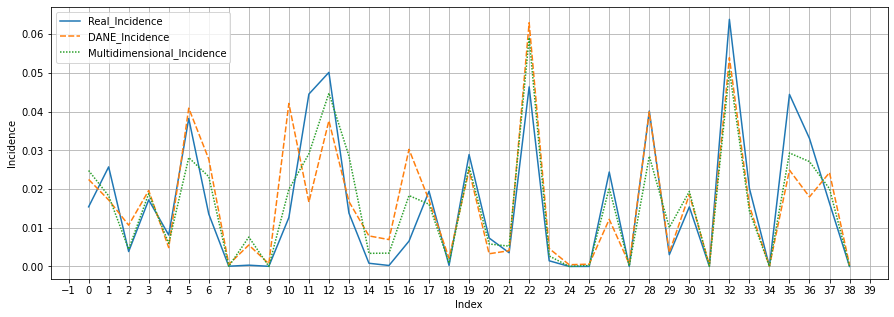

In [21]:
#Se grafican los datos reales de incidencia, los datos predicho por el modelo de DANE y los
# datos predichos por el modelo multidimensional
fig, ax = plt.subplots(figsize = (15, 5))
gr = sns.lineplot(data = predicciones, ax =ax)
gr.set(ylabel='Incidence')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.grid()
plt.show()

In [22]:
#Se obtienen los nombres de las ciudades que fueron evaluados para agregarlos al dataset
val_city = df_c.iloc[:,3:4].iloc[pre_dane_X.index.values,:].values
val_city

array([['Valledupar'],
       ['Armenia'],
       ['Bogota'],
       ['Santamarta'],
       ['Cartagena'],
       ['Neiva'],
       ['Cartagena'],
       ['Neiva'],
       ['Sanandres'],
       ['Cali'],
       ['Florencia'],
       ['Neiva'],
       ['Valledupar'],
       ['Santamarta'],
       ['Medellin'],
       ['Bucaramanga'],
       ['Sincelejo'],
       ['Medellin'],
       ['Manizales'],
       ['Tunja'],
       ['Riohacha'],
       ['Popayan'],
       ['Cartagena'],
       ['Monteria'],
       ['Pasto'],
       ['Ibague'],
       ['Ibague'],
       ['Sincelejo'],
       ['Quibdo'],
       ['Manizales'],
       ['Riohacha'],
       ['Popayan'],
       ['Manizales'],
       ['Bucaramanga'],
       ['Monteria'],
       ['Manizales'],
       ['Medellin'],
       ['Ibague'],
       ['Riohacha']], dtype=object)

In [23]:
#Se obtienen los años de las filas que fueron evaluados para agregarlos al dataset
val_year = df_c.iloc[:,4:5].iloc[pre_dane_X.index.values,:].values
val_year

array([[2020],
       [2021],
       [2020],
       [2020],
       [2020],
       [2021],
       [2021],
       [2020],
       [2020],
       [2020],
       [2021],
       [2020],
       [2021],
       [2020],
       [2020],
       [2020],
       [2020],
       [2021],
       [2020],
       [2021],
       [2021],
       [2021],
       [2021],
       [2021],
       [2020],
       [2020],
       [2021],
       [2020],
       [2021],
       [2021],
       [2020],
       [2020],
       [2021],
       [2021],
       [2020],
       [2020],
       [2020],
       [2020],
       [2020]], dtype=int64)

In [24]:
#Se obtienen los trimestres de las filas que fueron evaluadas para agregarlos al dataset
val_quarter = df_c.iloc[:,5:6].iloc[pre_dane_X.index.values,:].values
val_quarter

array([[4],
       [1],
       [2],
       [3],
       [2],
       [2],
       [1],
       [1],
       [2],
       [1],
       [2],
       [4],
       [2],
       [4],
       [2],
       [2],
       [4],
       [3],
       [2],
       [1],
       [4],
       [4],
       [2],
       [4],
       [1],
       [1],
       [1],
       [1],
       [2],
       [4],
       [3],
       [1],
       [2],
       [3],
       [1],
       [4],
       [4],
       [3],
       [1]], dtype=int64)

In [25]:
#Se agregan los datos obtenidos al nuevo dataset
predicciones['City'] = val_city
predicciones['Year'] = val_year
predicciones['Quarter'] = val_quarter
predicciones.index.name='Index'
predicciones

,Real_Incidence,DANE_Incidence,Multidimensional_Incidence,City,Year,Quarter
Index,,,,,,
0,0.015410,0.022478,0.024793,Valledupar,2020,4
1,0.025731,0.017187,0.018241,Armenia,2021,1
2,0.003851,0.010665,0.004465,Bogota,2020,2
3,0.017207,0.019625,0.018831,Santamarta,2020,3
4,0.008119,0.004872,0.005976,Cartagena,2020,2
5,0.038239,0.040901,0.028120,Neiva,2021,2
6,0.013558,0.027746,0.023214,Cartagena,2021,1
7,0.000058,0.000540,0.000032,Neiva,2020,1
8,0.000331,0.005542,0.007598,Sanandres,2020,2


In [29]:
#Se reorganizan las columnas mostrando la ciudad, año trimestre y datos predichos por cada modelo
predicciones = predicciones[['City','Year','Quarter','Real_Incidence','DANE_Incidence','Multidimensional_Incidence']]
predicciones

,City,Year,Quarter,Real_Incidence,DANE_Incidence,Multidimensional_Incidence
Index,,,,,,
20,Riohacha,2021,4,0.007358,0.003280,0.005806
21,Popayan,2021,4,0.003535,0.004067,0.005252
22,Cartagena,2021,2,0.046409,0.062987,0.059131
23,Monteria,2021,4,0.001464,0.004637,0.002714
24,Pasto,2020,1,0.000005,0.000448,0.000016
25,Ibague,2020,1,0.000017,0.000593,0.000242
26,Ibague,2021,1,0.024407,0.012175,0.020278
27,Sincelejo,2020,1,0.000003,0.000650,0.000121
28,Quibdo,2021,2,0.040171,0.039953,0.028498
